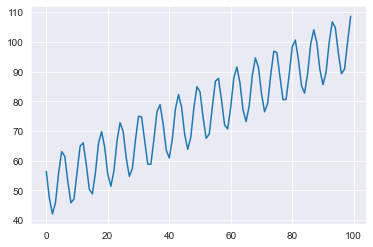

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
#Here we will just create a simple series
np.random.seed(100)
trend = np.linspace(1, 50, 100) + 50
seasonality = ((np.cos(np.arange(1, 101))*10))
y = trend + seasonality
#let's plot it
plt.plot(y)
plt.show()


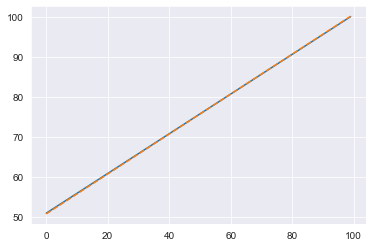

In [8]:
import statsmodels.api as sm
#A simple input matrix for a deterministic trend component
X = np.array([range(1, len(y) + 1),
              np.ones(len(y))]).T
mod = sm.OLS(y, X)
res = mod.fit()
fitted_trend = res.predict(X)
plt.plot(trend)
plt.plot(fitted_trend, linestyle='dashed')
plt.show()

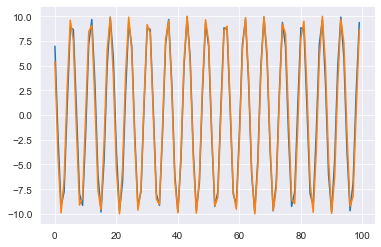

In [9]:
detrended_series = y - fitted_trend
#Set the seasonal period
seasonal_period = 25
#Get the average of every 25 data points to use as seasonality
avg_season = [np.mean(detrended_series[i::seasonal_period], axis=0) for i in range(seasonal_period)]
avg_season = np.array(avg_season)
fitted_seasonality = np.resize(avg_season, len(y))
plt.plot(fitted_seasonality)
plt.plot(seasonality)
plt.show()

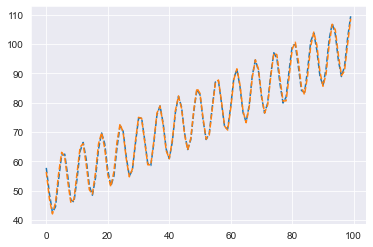

In [10]:
fitted = fitted_trend + fitted_seasonality
plt.plot(fitted, linestyle='dashed')
plt.plot(y, linestyle='dashed')
plt.show()

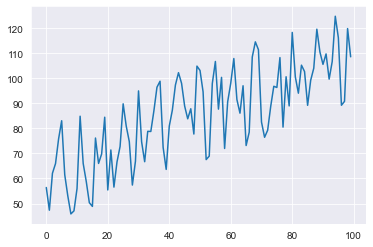

In [11]:
np.random.seed(100)
trend = np.linspace(1, 50, 100) + 50
seasonality = ((np.cos(np.arange(1, 101))*10))
exogenous = np.random.randint(low=0, high=2, size=len(trend))
y = trend + seasonality + exogenous * 20
plt.plot(y)
plt.show()

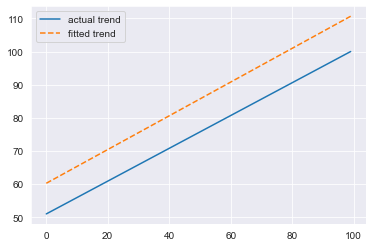

In [12]:
import statsmodels.api as sm
#A simple input matrix for a deterministic trend component
X = np.array([range(1, len(y) + 1),
              np.ones(len(y))]).T
mod = sm.OLS(y, X)
res = mod.fit()
fitted_trend = res.predict(X)
plt.plot(trend, label='actual trend')
plt.plot(fitted_trend, linestyle='dashed', label='fitted trend')
plt.legend()
plt.show()

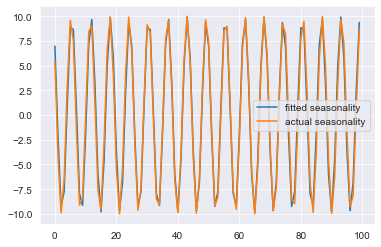

In [13]:
#Set the seasonal period
seasonal_period = 25
#Get the average of every 25 data points to use as seasonality
avg_season = [np.mean(detrended_series[i::seasonal_period], axis=0) for i in range(seasonal_period)]
avg_season = np.array(avg_season)
fitted_seasonality = np.resize(avg_season, len(y))
plt.plot(fitted_seasonality, label='fitted seasonality')
plt.plot(seasonality, label='actual seasonality')
plt.legend()
plt.show()

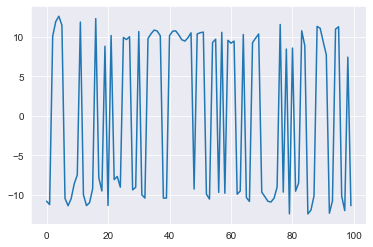

In [14]:
residuals = y - fitted_trend - fitted_seasonality
plt.plot(residuals)
plt.show()

In [15]:
X = np.column_stack([exogenous, np.ones(len(y))])
mod = sm.OLS(residuals, X)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.988
Model:                            OLS   Adj. R-squared:                  0.988
Method:                 Least Squares   F-statistic:                     8185.
Date:                Mon, 08 Aug 2022   Prob (F-statistic):           3.07e-96
Time:                        17:32:57   Log-Likelihood:                -152.48
No. Observations:                 100   AIC:                             309.0
Df Residuals:                      98   BIC:                             314.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            20.3199      0.225     90.471      0.0

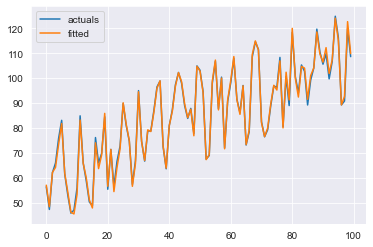

In [16]:
fitted_exogenous = res.predict(X)
fitted = fitted_trend + fitted_seasonality + fitted_exogenous
plt.plot(y, label='actuals')
plt.plot(fitted, label='fitted')
plt.legend()
plt.show()

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
np.random.seed(100)
trend = np.linspace(1, 50, 100) + 50
seasonality = ((np.cos(np.arange(1, 101))*10))
exogenous = np.random.randint(low=0, high=2, size=len(trend))
y = trend + seasonality + exogenous * 20
#reshape for 2d to pass to ThymeBoost
exogenous = exogenous.reshape(-1, 1)

In [20]:
from ThymeBoost import ThymeBoost as tb
boosted_model = tb.ThymeBoost(verbose=1)

In [21]:
output = boosted_model.fit(y,
                           trend_estimator='linear',
                           seasonal_estimator='classic',
                           exogenous_estimator='ols',
                           seasonal_period=25,
                           global_cost='maicc',
                           fit_type='global',
                           exogenous=exogenous)

********** Round 1 **********
Using Split: None
Fitting initial trend globally with trend model:
median()
seasonal model:
classic(False)
exogenous model:
ols model
cost: 562.1920178483408
********** Round 2 **********
Using Split: None
Fitting global with trend model:
linear((1, None))
seasonal model:
classic(False)
exogenous model:
ols model
cost: 320.2197426801961
********** Round 3 **********
Using Split: None
Fitting global with trend model:
linear((1, None))
seasonal model:
classic(False)
exogenous model:
ols model
cost: 226.30276308328652
********** Round 4 **********
Using Split: None
Fitting global with trend model:
linear((1, None))
seasonal model:
classic(False)
exogenous model:
ols model
cost: 145.28906725978143
********** Round 5 **********
Using Split: None
Fitting global with trend model:
linear((1, None))
seasonal model:
classic(False)
exogenous model:
ols model
cost: 82.27145384282161
********** Round 6 **********
Using Split: None
Fitting global with trend model:
linea

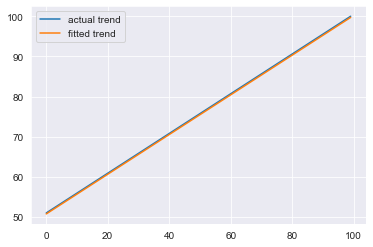

In [22]:
plt.plot(trend, label='actual trend')
plt.plot(output['trend'], label='fitted trend')
plt.legend()
plt.show()

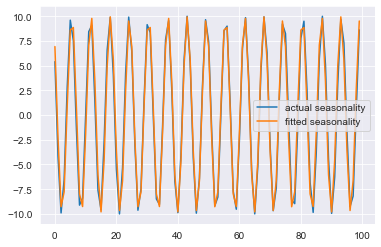

In [23]:
plt.plot(seasonality, label='actual seasonality')
plt.plot(output['seasonality'], label='fitted seasonality')
plt.legend()
plt.show()

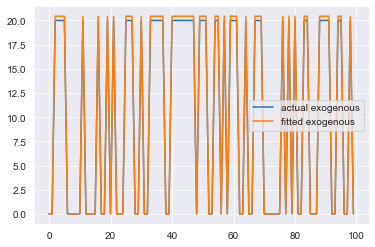

In [24]:
plt.plot(exogenous * 20, label='actual exogenous')
plt.plot(output['exogenous'], label='fitted exogenous')
plt.legend()
plt.show()

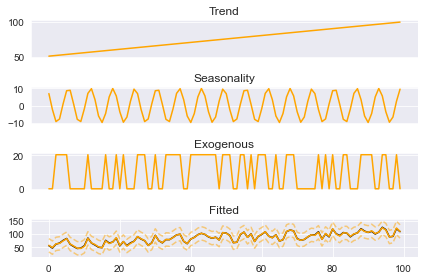

In [25]:
boosted_model.plot_components(output)

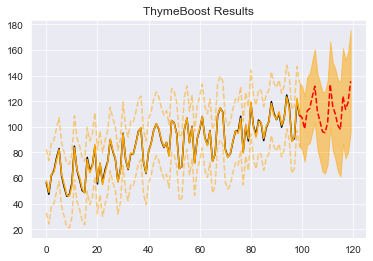

In [26]:
#create a future exogenous input
forecast_horizon = 20
np.random.seed(100)
future_exogenous = np.random.randint(low=0, high=2, size=forecast_horizon)
#use predict method and pass fitted output, forecast horizon, and future exogenous
predicted_output = boosted_model.predict(output,
                                         forecast_horizon=forecast_horizon,
                                         future_exogenous=future_exogenous)
boosted_model.plot_results(output, predicted_output)

In [27]:
output = boosted_model.fit(y,
                           trend_estimator='linear',
                           seasonal_estimator='classic',
                           exogenous_estimator='ols',
                           seasonal_period=25,
                           global_cost='maicc',
                           fit_type='global',
                           exogenous=exogenous)

********** Round 1 **********
Using Split: None
Fitting initial trend globally with trend model:
median()
seasonal model:
classic(False)
exogenous model:
ols model
cost: 562.1920178483408
********** Round 2 **********
Using Split: None
Fitting global with trend model:
linear((1, None))
seasonal model:
classic(False)
exogenous model:
ols model
cost: 320.2197426801961
********** Round 3 **********
Using Split: None
Fitting global with trend model:
linear((1, None))
seasonal model:
classic(False)
exogenous model:
ols model
cost: 226.30276308328652
********** Round 4 **********
Using Split: None
Fitting global with trend model:
linear((1, None))
seasonal model:
classic(False)
exogenous model:
ols model
cost: 145.28906725978143
********** Round 5 **********
Using Split: None
Fitting global with trend model:
linear((1, None))
seasonal model:
classic(False)
exogenous model:
ols model
cost: 82.27145384282161
********** Round 6 **********
Using Split: None
Fitting global with trend model:
linea

In [28]:
output = boosted_model.fit(y,
                           trend_estimator='linear',
                           seasonal_estimator='classic',
                           exogenous_estimator='ols',
                           seasonal_period=[25, 5],
                           global_cost='maicc',
                           fit_type='global',
                           exogenous=exogenous)

********** Round 1 **********
Using Split: None
Fitting initial trend globally with trend model:
median()
seasonal model:
classic(False)
exogenous model:
ols model
cost: 562.1920178483408
********** Round 2 **********
Using Split: None
Fitting global with trend model:
linear((1, None))
seasonal model:
classic(False)
exogenous model:
ols model
cost: 365.00324201303494
********** Round 3 **********
Using Split: None
Fitting global with trend model:
linear((1, None))
seasonal model:
classic(False)
exogenous model:
ols model
cost: 237.52311251690276
********** Round 4 **********
Using Split: None
Fitting global with trend model:
linear((1, None))
seasonal model:
classic(False)
exogenous model:
ols model
cost: 171.7548635762027
********** Round 5 **********
Using Split: None
Fitting global with trend model:
linear((1, None))
seasonal model:
classic(False)
exogenous model:
ols model
cost: 95.29453799390298
********** Round 6 **********
Using Split: None
Fitting global with trend model:
linea